# Chap 2 excercise

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Ex 1: The online code repository is “missing” code to create Figure 2-2. (It’s not really missing—I moved it into the solution to this exercise.) So, your goal here is to write our own code to produce Figure 2-2.

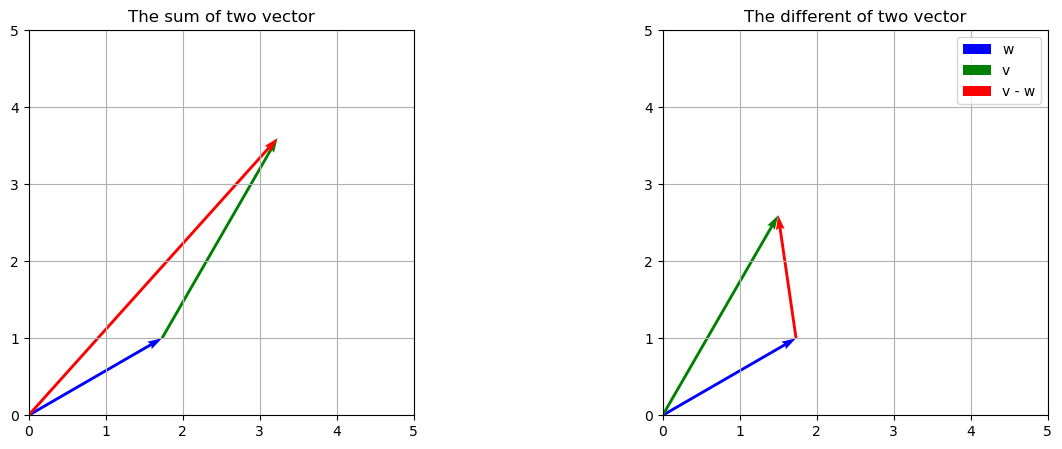

In [35]:
# create vector with length and angle 
def create_vector(mag: int, angle_degrees: int) : 
    angle_radians = np.radians(angle_degrees)
    x_comp = mag * np.cos(angle_radians)
    y_comp = mag * np.sin(angle_radians)
    return x_comp, y_comp


fig, ax = plt.subplots(nrows= 1, ncols = 2)
fig.set_figheight(5)
fig.set_figwidth(15)
x_1, y_1 = create_vector(2, 30)
x_2, y_2 = create_vector(3, 60)

ax[0].quiver(0, 0, x_1, y_1, angles = 'xy', scale_units = 'xy', scale = 1, color = 'blue', label = 'w')
ax[0].quiver(x_1, y_1, x_2, y_2, angles = 'xy', scale_units= 'xy', scale = 1, color = 'green', label = 'v')
ax[0].quiver(0, 0,  x_1 + x_2, y_1 + y_2, angles = 'xy', scale_units = 'xy',  scale = 1, color = 'red', label = 'w + v')
ax[0].set_aspect('equal')
ax[0].grid(True)

ax[0].set_xlim([0, 5])
ax[0].set_ylim([0, 5])
ax[0].set_title("The sum of two vector")

ax[1].quiver(0, 0, x_1, y_1, angles = 'xy', scale_units = 'xy', scale = 1, color = 'blue', label = 'w')
ax[1].quiver(0, 0, x_2, y_2, angles = 'xy', scale_units = 'xy', scale = 1, color = 'green', label = 'v')
ax[1].quiver(x_1, y_1, x_2 - x_1, y_2 - y_1, angles = 'xy', scale_units = 'xy', scale = 1, color = 'red', label = 'v - w')
ax[1].set_aspect('equal')
ax[1].grid(True)


ax[1].set_xlim([0, 5])
ax[1].set_ylim([0, 5])
ax[1].set_title("The different of two vector")

plt.legend()
plt.show()

Ex 2: Write an algorithm that computes the norm of a vector by translating Equation 2-7 into code. Confirm, using random vectors with different dimensionalities and orientations, that you get the same result as np.linalg.norm(). This exercise is designed to give you more experience with indexing NumPy arrays and translating formulas into code; in practice, it’s often easier to use np.linalg.norm().

In [13]:
def _norm(lst : np.array) : 
    s = sum([lst[i] ** 2 for i in range(len(lst))])
    return s ** 0.5

w = np.array([2, 5, 6])
v = np.array([3, 3, 2])
print(f'Norm : {_norm(w)}' )
print(f'func: {np.linalg.norm(w)}')

Norm : 8.06225774829855
func: 8.06225774829855


Ex 3: Create a Python function that will take a vector as input and output a unit vector in the same direction. What happens when you input the zeros vector?

In [14]:
def solve_3(arr : np.array) : 
    return arr / np.linalg.norm(arr)

In [15]:
solve_3(np.array([9, 10, 2]))

array([0.66169316, 0.73521462, 0.14704292])

In [16]:
solve_3(np.array([0, 0, 0]))

C:\Users\Asus\AppData\Local\Temp\ipykernel_22452\3297836976.py:2: RuntimeWarning: invalid value encountered in divide
  return arr / np.linalg.norm(arr)


array([nan, nan, nan])

Exercise 2-4. You know how to create unit vectors; what if you want to create a vector of any arbitrary magnitude? Write a Python function that will take a vector and a desired magnitude as inputs and will return a vector in the same direction but with a magnitude corresponding to the second input.

In [17]:
def solve_4(v : np.array, mag :int) : 
    beta = mag / np.linalg.norm(v)
    return beta * v 

In [22]:
solve_4(np.array([9, 3, 5, 2]), 8)

array([6.60022918, 2.20007639, 3.66679399, 1.4667176 ])

Exercise 2-5. Write a for loop to transpose a row vector into a column vector without using a built-in function or method such as np.transpose() or v.T. This exercise will help you create and index orientation-endowed vectors

In [23]:
def solve_5(vec :np.array) : 
    r, c = vec.shape
    res = [[0 for _ in range(r)] for _ in range(c)]
    for i in range(r) :
        for j in range(c) : 
            res[j][i] = vec[i][j]
    return np.array(res)

In [26]:
vec = np.array([[3, 4, 5], [9, 3, 4]])
print(solve_5(vec))

[[3 9]
 [4 3]
 [5 4]]


Exercise 2-6.
Here is an interesting fact: you can compute the squared norm of a vector as the dot product of that vector with itself. Look back to Equation 2-8 to convince yourself of this equivalence. Then confirm it using Python. $$ \| v\| ^2 = v^Tv $$

In [29]:
c = np.random.randn(5)
print(np.linalg.norm(c) ** 2)
print(np.dot(c, c))

2.4230304927393878
2.423030492739388


Exercise 2-7.
Write code to demonstrate that the dot product is commutative. Commutative means that a × b = b × a, which, for the vector dot product, means that $a^Tb = b^Ta $ After
demonstrating this in code, use equation Equation 2-9 to understand why the dot
product is commutative.

In [30]:
a = np.random.randn(7)
b = np.random.randn(7)

print(f'Dot a x b: {np.dot(a,  b)}')
print(f'Dot b x a: {np.dot(b, a)}')

Dot a x b: 3.384299962333838
Dot b x a: 3.384299962333838


Exercise 2-8.
Write code to produce Figure 2-6. (Note that your solution doesn’t need to look
exactly like the figure, as long as the key elements are present.)

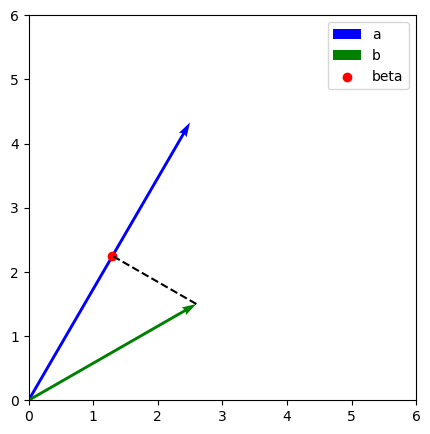

In [56]:
x_1, y_1 = create_vector(5, 60)
x_2, y_2 = create_vector(3, 30)
a = np.array([x_1, y_1])
b = np.array([x_2, y_2])
def find_beta(b :np.array, a: np.array) : 
    return np.dot(a, b) / np.dot(a, a)

x_b, y_b = create_vector(5 * find_beta(b, a), 60)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.quiver(0, 0, x_1, y_1, angles = 'xy', scale_units = 'xy', scale = 1, color = 'blue', label = 'a')
ax.quiver(0, 0, x_2, y_2, angles = 'xy', scale_units = 'xy', scale = 1, color = 'green', label = 'b')
plt.scatter([x_b], [y_b], color = 'red', label =  'beta')
ax.plot([x_2, x_b], [y_2, y_b], linestyle =  '--', color = 'black')
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])

plt.legend()
plt.show()

Exercise 2-9.
Implement orthogonal vector decomposition. Start with two random-number vectors
t and r, and reproduce Figure 2-8 (note that your plot will look somewhat different due to random numbers). Next, confirm that the two components sum to t and that t ⊥ r and t ∥ r are orthogonal

In [52]:
def decomposition(target :np.array, refer : np.array) :
    beta = find_beta(target, refer)

    t_p = beta * refer

    t_o = target - t_p 
    return t_o, t_p

target = np.random.randint(2,5,2)
refer = np.random.randint(2,5,2)

t_o, t_p = decomposition(target, refer)

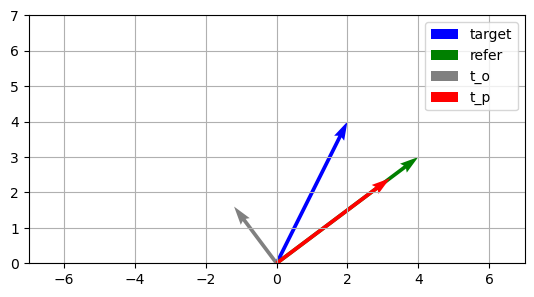

In [55]:
fig, ax = plt.subplots()

ax.quiver(0, 0, target[0], target[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'blue', label = 'target')
ax.quiver(0, 0, refer[0], refer[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'green', label = 'refer')
ax.quiver(0, 0, t_o[0], t_o[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'grey', label = 't_o')
ax.quiver(0, 0, t_p[0], t_p[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'red', label = 't_p')

ax.plot()

ax.set_aspect('equal')
ax.grid(True)

ax.set_xlim([-7, 7])
ax.set_ylim([0, 7])

plt.legend()
plt.show()